# Exercise 11.1

### Introduction
The purpose of this exercise is to start working with Neural Networks and, then learn how to work with Deep and Convolutional ones. In particular, this exercise focuses on comprehend how a single neuron works, indeed, it is characterized by a weight and a bias, such as straight line is complitely described by a slope (the weight) and an intercept (the bias), then the exercise consists of fitting some given set of data.

### Dataset
The set is made of 1050 points, their *x* is uniformly generated in $[-1, 1)$, while *y* is calculated using the following linear relation

$$
y = 2 x + 1
$$

In order to test the neuron structure is possible to apply some Gaussian noise onto the ordinates, with a certain $\sigma$.

1000 points compose the training set, and the other 50 points are the validation set.

### Neural Network
The neural network is sequential, made of a single neuron, thus it is characterized by only two parameters (the already described slope and bias), as optimizer has been chosen the **stochastic gradient descent**, and as loss measure has been chosen the **mean square error**.

The network has been trained for 50 epochs, dividing the training set into batch of 20 elements each, and shuffling the set at the end of every epoch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Linear fit
# Linear fit parameters
m = 2
q = 1
def linear(x):
    return m * x + q

# Generation of training and validation points
np.random.seed(0)
x_t = np.random.uniform(-1., 1., 1000)
x_v = np.random.uniform(-1., 1., 50)
x_v.sort()
# Noise
sigma = 0.2
y_t = np.random.normal(linear(x_t), sigma)
y_v = np.random.normal(linear(x_v), sigma)
# Ideal linear function (for comparison)
y_c = linear(x_v)

# Neural network setup
model = Sequential()
model.add(Dense(1, input_shape=(1,)))
# Neural network compile
model.compile(optimizer="sgd", loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [2]:
# Fit the model (trainig dataset)
# Fixing the fit parameters
bsize = 20
nepoc = 50
history = model.fit(x=x_t, y=y_t, batch_size=bsize,
                    epochs=nepoc, verbose=1, shuffle=True, validation_data=(x_v, y_v))

Epoch 1/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5530 - val_loss: 0.2057
Epoch 2/50
50/50 [==============================] - 0s 898us/step - loss: 0.1348 - val_loss: 0.0810
Epoch 3/50
50/50 [==============================] - 0s 857us/step - loss: 0.0656 - val_loss: 0.0558
Epoch 4/50
50/50 [==============================] - 0s 918us/step - loss: 0.0492 - val_loss: 0.0465
Epoch 5/50
50/50 [==============================] - 0s 816us/step - loss: 0.0432 - val_loss: 0.0416
Epoch 6/50
50/50 [==============================] - 0s 776us/step - loss: 0.0405 - val_loss: 0.0387
Epoch 7/50
50/50 [==============================] - 0s 939us/step - loss: 0.0392 - val_loss: 0.0368
Epoch 8/50
50/50 [==============================] - 0s 735us/step - loss: 0.0385 - val_loss: 0.0356
Epoch 9/50
50/50 [==============================] - 0s 776us/step - loss: 0.0382 - val_loss: 0.0350
Epoch 10/50
50/50 [==============================] - 0s 735us/step - loss: 0.0380 - val_loss: 0.0346
E

### Results
The results of fitted slope and intercet are shown below, the values are very similar to the fixed ones. 

The plot below shows the trend of the losses of the training and validation set in function of the epochs.

Fitted slope = 1.9923
Fitted intercet = 1.0061

Test loss (validation) = 0.033650897443294525

Test loss (comparison) = 6.136280717328191e-05


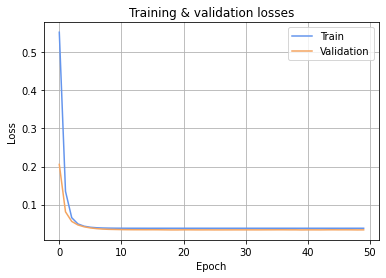

In [3]:
# Get the weights of the linear regression
w = model.get_weights()
# Print fitted parameters
print("Fitted slope =", round(float(w[0]), 4))
print("Fitted intercet =", round(float(w[1]), 4))

# Evaluate the model (validation)
score = model.evaluate(x_v, y_v, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (validation) =", score)
# Evaluate the model (comparison)
score = model.evaluate(x_v, y_c, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (comparison) =", score)

# Plot training and validation losses
plt.plot(history.history["loss"], color="cornflowerblue")
plt.plot(history.history["val_loss"], color="sandybrown")
plt.title("Training & validation losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()
plt.show()

### Predictions
The result can be tested generating 100 points, and using the predict method of the trained model to estimate the value of the *y* according to the given *x*. The plot shows a very good agreement between the prediction and the defined straight line.

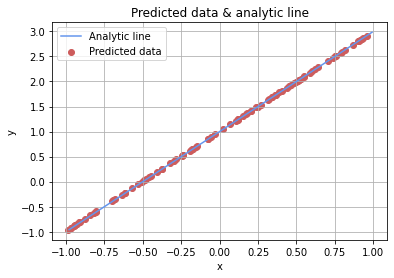

In [4]:
# Let's predict some data
x_p = np.random.uniform(-1., 1., 100)
y_p = model.predict(x_p)
# Plot the predicted points & the comparison data
plt.plot(x_v, y_c, color="cornflowerblue")
plt.scatter(x_p, y_p, color="indianred")
plt.title("Predicted data & analytic line")
plt.legend(["Analytic line", "Predicted data"], loc=0)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()